<h1> Importing The Necessary Modules </h1>

In [1]:
import tweepy as twt
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
logDets = pd.read_csv('Login.csv')
# print(logDets)

In [3]:
# The Twitter API credentials
consumerKey = logDets['key'][0]
consumerSecret = logDets['key'][1]
accessToken = logDets['key'][2]
accessTokenSecret = logDets['key'][3]


In [4]:
# Auth Object
authenticate = twt.OAuthHandler(consumerKey, consumerSecret)

# Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

# Create API object
api = twt.API(authenticate, wait_on_rate_limit=True)

In [5]:
# Extract 100 tweets from Twitter user
posts = api.user_timeline(id = '@owusu2kelvin', count=20, lang = 'en', tweet_mode = 'extended')

# Show tweets
print("Show tweets" + '\n')
n = 1
for tweet in posts[0:5]:
    print(str(n) + ') '+tweet.full_text + "\n")
    n=n+1

Show tweets

1) RT @getfandomgaming: PS5 loaded up in a major way 🔥
#PlayStationShowcase https://t.co/Q2Pcuud5g2

2) RT @getFANDOM: Appreciating #TheMatrixResurrections color palette

🟢🔵🔴🟡 https://t.co/JxQSw0gmjQ

3) RT @brfootball: The biggest choice there is. https://t.co/NBXTx0RKLu

4) RT @getFANDOM: #TheMatrixMovie trailer is finally here 🤩

(via @TheMatrixMovie | #MatrixResurrections)
https://t.co/0RZ9Oto1jy

5) RT @chargers: come on, voiceover guy 🤣

@ESPNNFL | #BoltUp https://t.co/82odqlL0rG



In [6]:
# Create dataframe with column called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

df.head()

,Tweets
0,RT @getfandomgaming: PS5 loaded up in a major ...
1,RT @getFANDOM: Appreciating #TheMatrixResurrec...
2,RT @brfootball: The biggest choice there is. h...
3,RT @getFANDOM: #TheMatrixMovie trailer is fina...
4,"RT @chargers: come on, voiceover guy 🤣\n\n@ESP..."


In [7]:
# Cleaning the text using a function
def cleanTxt(text):
    text =re.sub(r'@[A-Za-z0-9_]+', '', text) # Removing @mentions
    text = re.sub(r'#', '', text) # Removing Hashtags
    text = re.sub(r'RT[\s]+:', '', text) # Removing RT
    text = re.sub(r'https?:\/\/\S+', '', text) # Removing hyperlinks

    return text

df['Tweets'] = df['Tweets'].apply(cleanTxt) # Cleaning the texts

df.head() # Showing the cleaned texts

,Tweets
0,PS5 loaded up in a major way 🔥\nPlayStationSh...
1,Appreciating TheMatrixResurrections color pal...
2,The biggest choice there is.
3,TheMatrixMovie trailer is finally here 🤩\n\n(...
4,"come on, voiceover guy 🤣\n\n | BoltUp"


In [8]:
# A function to get the subjectivity
def getSubject(text):
    return TextBlob(text).sentiment.subjectivity

# A funtion to get polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Adding two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubject)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [9]:
df

,Tweets,Subjectivity,Polarity
0,PS5 loaded up in a major way 🔥\nPlayStationSh...,0.500000,0.062500
1,Appreciating TheMatrixResurrections color pal...,0.000000,0.000000
2,The biggest choice there is.,0.000000,0.000000
3,TheMatrixMovie trailer is finally here 🤩\n\n(...,1.000000,0.000000
4,"come on, voiceover guy 🤣\n\n | BoltUp",0.000000,0.000000
5,"No more video games, fan clubs or boy-band ad...",0.291667,-0.125000
6,Days until the rest of 2021's Marvel films &a...,0.000000,0.000000
7,College football is wild 🤘\n\n(via ) \n,0.400000,0.100000
8,China's first Universal Studios theme park op...,0.166667,0.125000
9,KAWHI in the Way 2 Sexy music video 🤣 (via ),1.000000,0.500000


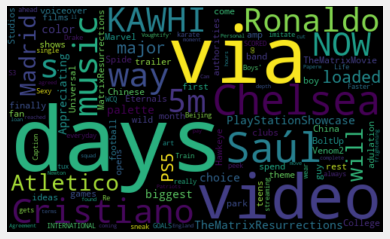

In [10]:
# Plotting a WordCloud for visualizing most used words
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# Create function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

my_d = df.to_dict(orient='list')
# my_d
df.head(20)

,Tweets,Subjectivity,Polarity,Analysis
0,PS5 loaded up in a major way 🔥\nPlayStationSh...,0.500000,0.062500,Positive
1,Appreciating TheMatrixResurrections color pal...,0.000000,0.000000,Neutral
2,The biggest choice there is.,0.000000,0.000000,Neutral
3,TheMatrixMovie trailer is finally here 🤩\n\n(...,1.000000,0.000000,Neutral
4,"come on, voiceover guy 🤣\n\n | BoltUp",0.000000,0.000000,Neutral
5,"No more video games, fan clubs or boy-band ad...",0.291667,-0.125000,Negative
6,Days until the rest of 2021's Marvel films &a...,0.000000,0.000000,Neutral
7,College football is wild 🤘\n\n(via ) \n,0.400000,0.100000,Positive
8,China's first Universal Studios theme park op...,0.166667,0.125000,Positive
9,KAWHI in the Way 2 Sexy music video 🤣 (via ),1.000000,0.500000,Positive


In [12]:
# Count of Negative, Neutral and Positive analysis
df['Analysis'].value_counts()

Neutral     9
Positive    8
Negative    3
Name: Analysis, dtype: int64

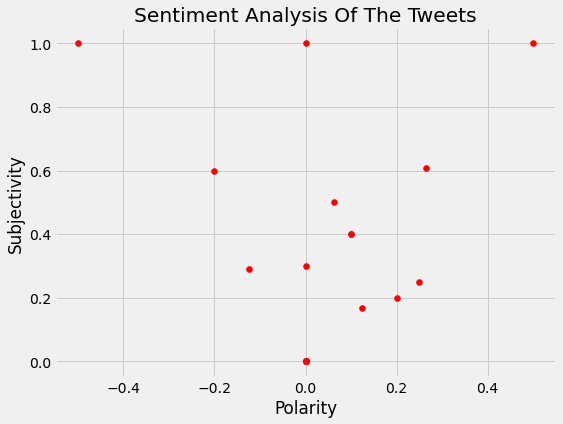

In [13]:
# Plotting the ploarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(len(df)):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis Of The Tweets')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()